In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import  Flatten, ZeroPadding2D, Activation , Conv2D , BatchNormalization , Add , MaxPooling2D , AveragePooling2D , Dense
import tensorflow_datasets as tfds
print("Version of tensorflow is : ",tf.__version__)
from tensorflow.keras.utils import plot_model

Version of tensorflow is :  2.12.0


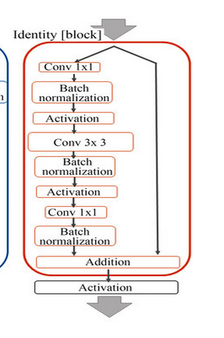

In [3]:
class Identity(Model):
    def __init__(self, filters, **kwargs):
        super(Identity, self).__init__()
        
        f1, f2, f3 =filters
        self.conv_1 = Conv2D(filters=f1, kernel_size=1, padding="valid")
        self.bn_1 = BatchNormalization()
        self.act=Activation("relu")
        
        self.conv_2= Conv2D(filters= f2, kernel_size=3, padding="same")
        self.bn_2 = BatchNormalization()
        
        self.conv_3= Conv2D(filters=f3, kernel_size=1, padding="valid")
        self.bn_3= BatchNormalization()
        
        self.add=Add()
        
    def call(self, inputs):
        x= self.conv_1(inputs)
        x= self.bn_1(x)
        x= self.act(x)
            
        x= self.conv_2(x)
        x= self.bn_2(x)
        x= self.act(x)
            
        x= self.conv_3(x)
        x= self.bn_3(x)
            
        x= self.add([inputs, x])
        x= self.act(x)
        return x  

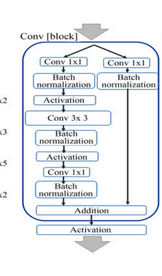

In [4]:
class Conv(Model):
    def __init__(self, filters, s=2, **kwargs):
        super(Conv, self).__init__()
        
        f1, f2, f3 =filters
        self.conv_1 = Conv2D(filters=f1, kernel_size=1, strides=s, padding="valid")
        self.bn_1 = BatchNormalization()
        self.act=Activation("relu")
        
        self.conv_2= Conv2D(filters= f2, kernel_size=3, padding="same")
        self.bn_2 = BatchNormalization()
        
        self.conv_3= Conv2D(filters=f3, kernel_size=1, padding="valid")
        self.bn_3= BatchNormalization()
        
        self.conv_shortcut= Conv2D(filters= f3, kernel_size=1, strides=s, padding="valid")
        self.bn_shortcut= BatchNormalization()
        
        self.add=Add()
        
    def call(self, inputs):
        x= self.conv_1(inputs)
        x= self.bn_1(x)
        x= self.act(x)
            
        x= self.conv_2(x)
        x= self.bn_2(x)
        x= self.act(x)
            
        x= self.conv_3(x)
        x= self.bn_3(x)
            
        x_shortcut= inputs
        x_shortcut= self.conv_shortcut(x_shortcut)
        x_shortcut= self.bn_shortcut(x_shortcut)
            
            
        x= self.add([x_shortcut, x])
        x= self.act(x)
        return x  

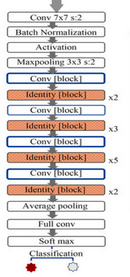

In [9]:
class ResNet50(Model):
    def __init__(self, num_classes, **kwargs):
        super(ResNet50, self).__init__()
        
        self.zero_pad= ZeroPadding2D((3,3))
        self.conv= Conv2D(filters= 64, kernel_size=7, strides=2)
        self.bn= BatchNormalization()
        self.pool= MaxPooling2D((3,2))
        
        self.conv_block1= Conv(filters=[64, 64, 256], s=1)
        self.id_block1= Identity(filters=[64, 64, 256])
        self.id_block2= Identity(filters=[64, 64, 256])
        
        self.conv_block2= Conv(filters=[128, 128, 512], s=2)
        self.id_block3= Identity(filters=[128, 128, 512])
        self.id_block4= Identity(filters=[128, 128, 512])
        self.id_block5= Identity(filters=[128, 128, 512])
        
        self.conv_block3= Conv(filters=[256, 256, 1024], s=2)
        self.id_block6= Identity(filters=[256, 256, 1024])
        self.id_block7= Identity(filters=[256, 256, 1024])
        self.id_block8= Identity(filters=[256, 256, 1024])
        self.id_block9= Identity(filters=[256, 256, 1024])
        self.id_block10= Identity(filters=[256, 256, 1024])
        
        self.conv_block4= Conv(filters=[512, 512, 2048], s=2)
        self.id_block11= Identity(filters=[512, 512, 2048])
        self.id_block12= Identity(filters=[512, 512, 2048])
        
        self.avg_pool= AveragePooling2D((2,2))
        self.flatten= Flatten()
        self.fc1= Dense(num_classes, activation="softmax")
        
    def call(self, inputs):
        x= self.zero_pad(inputs)
        x= self.conv(x)
        x=self.bn(x)
        x= self.pool(x)
        x=self.conv_block1(x)
        x=self.id_block1(x)
        x=self.id_block2(x)
        x=self.conv_block2(x)
        x=self.id_block3(x)
        x=self.id_block4(x)
        x=self.id_block5(x)
        x=self.conv_block3(x)
        x=self.id_block6(x)
        x=self.id_block7(x)
        x=self.id_block8(x)
        x=self.id_block9(x)
        x=self.id_block10(x)
        x=self.conv_block4(x)
        x=self.id_block11(x)
        x=self.id_block12(x)
        x=self.avg_pool(x)
        x=self.flatten(x)
        x=self.fc1(x)
        return x
        ###Check sanity test
    def model(self):
        x= tf.keras.layers.Input(shape=(64, 64, 3))
        return Model(inputs=[x], outputs=self.call(x))
            

        

In [10]:
model=ResNet50(1000)
model= model.model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 32, 32, 64)        9472      
                                                                 
 batch_normalization_106 (Ba  (None, 32, 32, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 16, 64)       0         
 2D)                                                             
                                                           